In [ ]:
!pip install top2vec
!pip install top2vec[sentence_encoders]
!pip install top2vec[sentence_transformers]

In [ ]:
from top2vec import Top2Vec

In [ ]:
#Basic Python and Machine learning libraries
import os, sys, warnings, random, time, re, math, string, copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from string import punctuation
from collections import Counter,defaultdict
from re import search
from scipy import stats

from wordcloud import WordCloud, STOPWORDS

from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# sklearn data science models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier, Lasso
from sklearn.svm import LinearSVC
import xgboost as xgb

from bs4 import BeautifulSoup

import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize.casual import casual_tokenize
from nltk.util import ngrams

import spacy

warnings.filterwarnings('ignore')

#tqdm with pandas
from tqdm import tqdm
tqdm.pandas()
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
fname = '/content/drive/MyDrive/intern-unsw/assets/Bhagavad_EdwinArnold_refined1.txt'
with open(fname, 'r', encoding='utf-8-sig') as f:
  data = f.read()
  f.close()

In [ ]:
data

' chapter i dhritirashtra: ranged thus for battle on the sacred plain - on kurukshetra - say, sanjaya! say what wrought my people, and the pandavas? sanjaya: when he beheld the host of pandavas, raja duryodhana to drona drew, and speak these words:”ah, guru! see this line, how vast it is of pandu fighting-men, embattled by the son of drupada, your scholar in the war! therein stand ranked chiefs like arjuna, like to bhima chiefs, benders of bows; virata, yuyudhan, drupada, eminent upon his car, dhrishtaket, chekitan, kasi stout lord, purujit, kuntibhoj, and saivya, with yudhamanyu, and uttamauj subhadra child; and drupadi;-all famed! all mounted on their shining chariots! on our side, too,--you best of brahmaan! see excellent chiefs, commanders of my line, whose names i joy to count: yourself the first, then bhishma, karna, kripa fierce in fight, vikarna, aswatthaman; next to these strong saumadatti, with full many more valiant and tried, ready this day to die for me their king, each wi

In [ ]:
data = data.replace("chapter i dhritirashtra: ", "dhritirashtra: ")
data = data.replace("here endeth chapter i. of the bhagavad-gita, entitled \"arjun-vishad,\" or \"the book of the distress of arjuna.\" ", "")
data = data.replace("chapter ii sanjaya.", "\n")
data = data.replace("here endeth chapter ii. of the bhagavad-gita, entitled \"sankhya-yog,\" or \"the book of doctrines.\" ", "")
data = data.replace("chapter iii arjuna.", "\n")
data = data.replace("here endeth chapter iii. of the bhagavad-gita, entitled \"karma-yog,\" or \"the book of virtue in work.\"", "")
data = data.replace("chapter iv krishna.", "\n")
data = data.replace("here endeth chapter iv. of the bhagavad-gita, entitled \"jnana yog,\" or \"the book of the religion of knowledge,\"", "")
data = data.replace("chapter v arjuna.", "\n")
data = data.replace("here ends chapter v. of the bhagavad-gita, entitled \"karmasanyasayog,\" or \"the book of religion by renouncing fruit of works.\"", "")
data = data.replace("chapter vi krishna.", "\n")
data = data.replace("here endeth chapter vi. of the bhagavad-gita, entitled \"atmasanyamayog,\" or \"the book of religion by self-restraint.\"", "")
data = data.replace("chapter vii krishna.", "\n")
data = data.replace("here endeth chapter vii. of the bhagavad-gita, entitled \"vijnanayog,\" or \"the book of religion by discernment.\"", "")
data = data.replace("chapter viii arjuna.", "\n")
data = data.replace("here endeth chapter viii. of the bhagavad-gita, entitled \"aksharaparabrahmaayog,\" or \"the book of religion by devotion to the one supreme god.\"", "")
data = data.replace("chapter ix krishna.", "\n")
data = data.replace("here ends chapter ix. of the bhagavad-gita, entitled \"rajavidyarajaguhyayog,\" or \"the book of religion by the kingly knowledge and the kingly mystery.\"", "")
data = data.replace("chapter x krishna.", "\n")
data = data.replace("here endeth chapter x. of the bhagavad-gita, entitled \"vibhuti yog,\" or \"the book of religion by the heavenly perfections.\"", "")
data = data.replace("chapter xi arjuna.", "\n")
data = data.replace("here endeth chapter xi. of the bhagavad-gita, entitled \"viswarupadarsanam,\" or \"the book of the manifesting of the one and manifold.\"", "")
data = data.replace("chapter xii arjuna.", "\n")
data = data.replace("here endeth chapter xii. of the bhagavad-gita, entitled \"bhaktiyog,\" or\"the book of the religion of faith.\"", "")
data = data.replace("chapter xiii arjuna.", "\n")
data = data.replace("here ends chapter xiii. of the bhagavad-gita, entitled \"kshetrakshetrajnavibhagayog,\" or \"the book of religion by separation of matter and spirit.\"", "")
data = data.replace("chapter xiv krishna.", "\n")
data = data.replace("here ends chapter xiv. of the bhagavad-gita entitled \"gunatrayavibhagayog,\" or \"the book of religion by separation from the qualities.\"", "")
data = data.replace("chapter xv krishna.", "\n")
data = data.replace("here ends chapter xv. of the bhagavad-gita entitled \"purushottamapraptiyog,\" or \"the book of religion by attaining the supreme.\"", "")
data = data.replace("chapter xvi krishna.", "\n")
data = data.replace(" . . . . . . . . . . . . here endeth chapter xvi. of the bhagavad-gita, entitled \"daivasarasaupadwibhagayog,\" or \"the book of the separateness of the divine and undivine.\"", "")
data = data.replace("chapter xvii arjuna.", "\n")
data = data.replace("here endeth chapter xvii. of the bhagavad-gita, entitled \"sraddhatrayavibhagayog,\" or \"the book of religion by the threefold kinds of faith.\"", "")
data = data.replace("chapter xviii arjuna.", "\n")
data = data.replace("here ends, with chapter xviii., entitled \"mokshasanyasayog,\" or \"the book of religion by deliverance and renunciation,\" the bhagavad-gita. some repetitionary lines are here omitted. technical phrases of vedic religion. the whole of this passage is highly involved and difficult to render. i feel convinced sankhyanan and yoginan must be transposed here in sense. i am doubtful of accuracy here. a name of the sun. wiyout desire of fruit. that is,\"joy and sorrow, success and failure, heat and cold,\"&c. i.e., the body. the sanskrit has this play on the double meaning of atman. so in original. beings of low and devilish nature. krishna. i read here janma, \"birth;\" not jara,\"age\" i have discarded ten lines of sanskrit text here as an undoubted interpolation by some vedanthis ist the sanskrit poem here rises to an elevation of style and manner which i have endeavoured to mark by change of metre. ahinsa. the nectar of immortality. called \"the jap.\" the compound form of sanskrit words. \"kamalapatraksha\" these are all divine or deified orders of the hindoo pantheon. \"hail to you, god of gods! be favourable!\" the wind. \"not peering about,\"anapeksha. the calcutta edition of the mahabharata has these three opening lines. this is the nearest possible version of kshetrakshetrajnayojnanan yat tajnan matan mama. i omit two lines of the sanskrit here, evidently interpolated by some vedanthis ist. wombs. i do not consider the sanskrit verses here-which are somewhat freely rendered - \"an attack on the authority of the vedas,\" with mr davies, but a beautiful lyrical episode, a new \"parable of the fig-tree.\" i omit a verse here, evidently interpolated. \"of the asuras,\"lit. i omit the ten concluding shlokas, with mr davis. rakshasas and yakshas are unembodied but capricious beings of great power, gifts, and beauty, same times also of benignity. these are spirits of evil wandering ghosts. yatayaman, food which has remained after the watches of the night. in india this would probably \"go bad.\" i omit the concluding shlokas, as of very doubtful authenticity. end of the project gutenberg etext, the bhagavad-gita, translated by sir edwin arnold", "")
data = data.replace("?", ".")
data = data.replace("!", ".")
data = "".join([character if (character.isalnum() or character == "." or character ==" " or character == "\n") else " " for character in data])
data = re.sub(r'  ', " ", data)
data = data.replace(". .", ".")

In [ ]:
chapters = data.split("\n")
chapters = chapters[:18]

## Using top2vec model for the topic modelling of each chapters

In [ ]:
all_sent = defaultdict(list)
all_chapters_sent = []
for i, chapter in enumerate(chapters):
  sentences = nltk.sent_tokenize(chapter)
  
  all_sent[i] += [sentence for sentence in sentences if len(nltk.word_tokenize(sentence))>2]
  all_chapters_sent += [sentence for sentence in sentences if len(nltk.word_tokenize(sentence))>2]
len(all_sent)

18

In [ ]:
len(all_chapters_sent)

1038

## Chapter 2 using bert

In [ ]:
from top2vec import Top2Vec
model = Top2Vec(documents= all_sent[1], speed="learn", workers=8, min_count = 2, embedding_model='universal-sentence-encoder')

2021-05-20 09:17:33,888 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2021-05-20 09:17:33,909 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model


2021-05-20 09:17:38,567 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


2021-05-20 09:17:38,855 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


2021-05-20 09:17:42,603 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2021-05-20 09:17:42,614 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
model.get_num_topics()

2

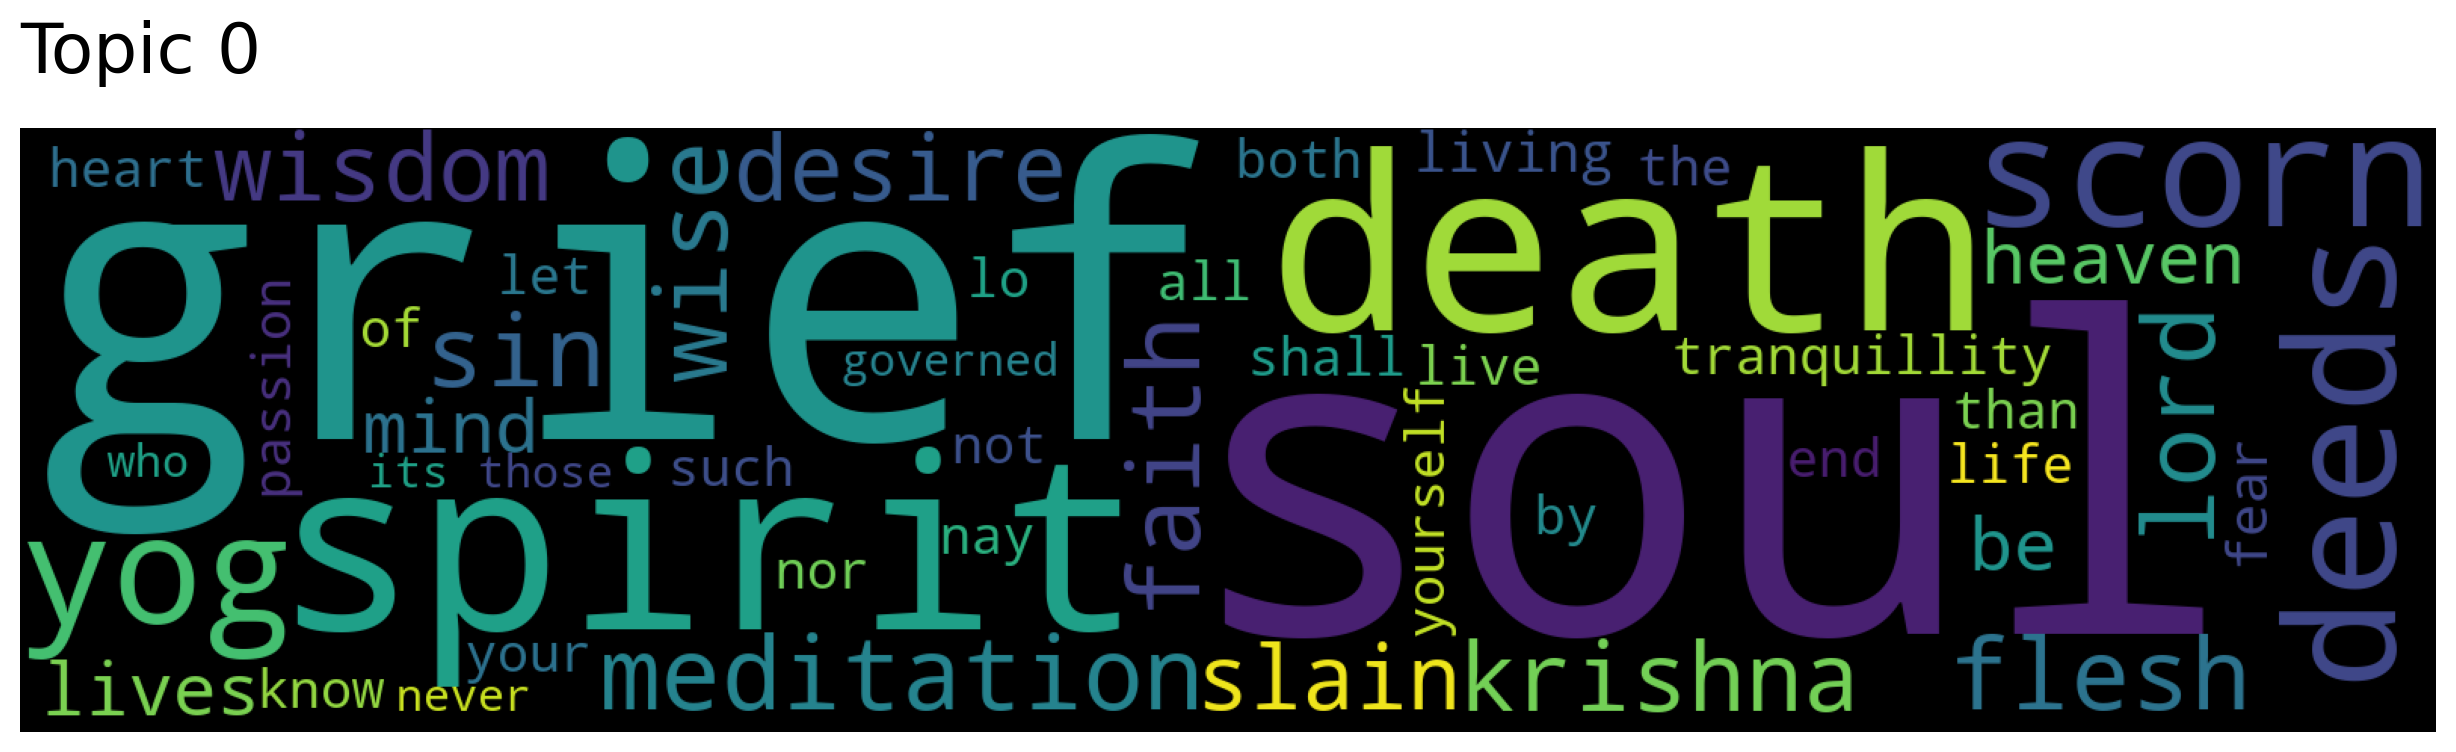

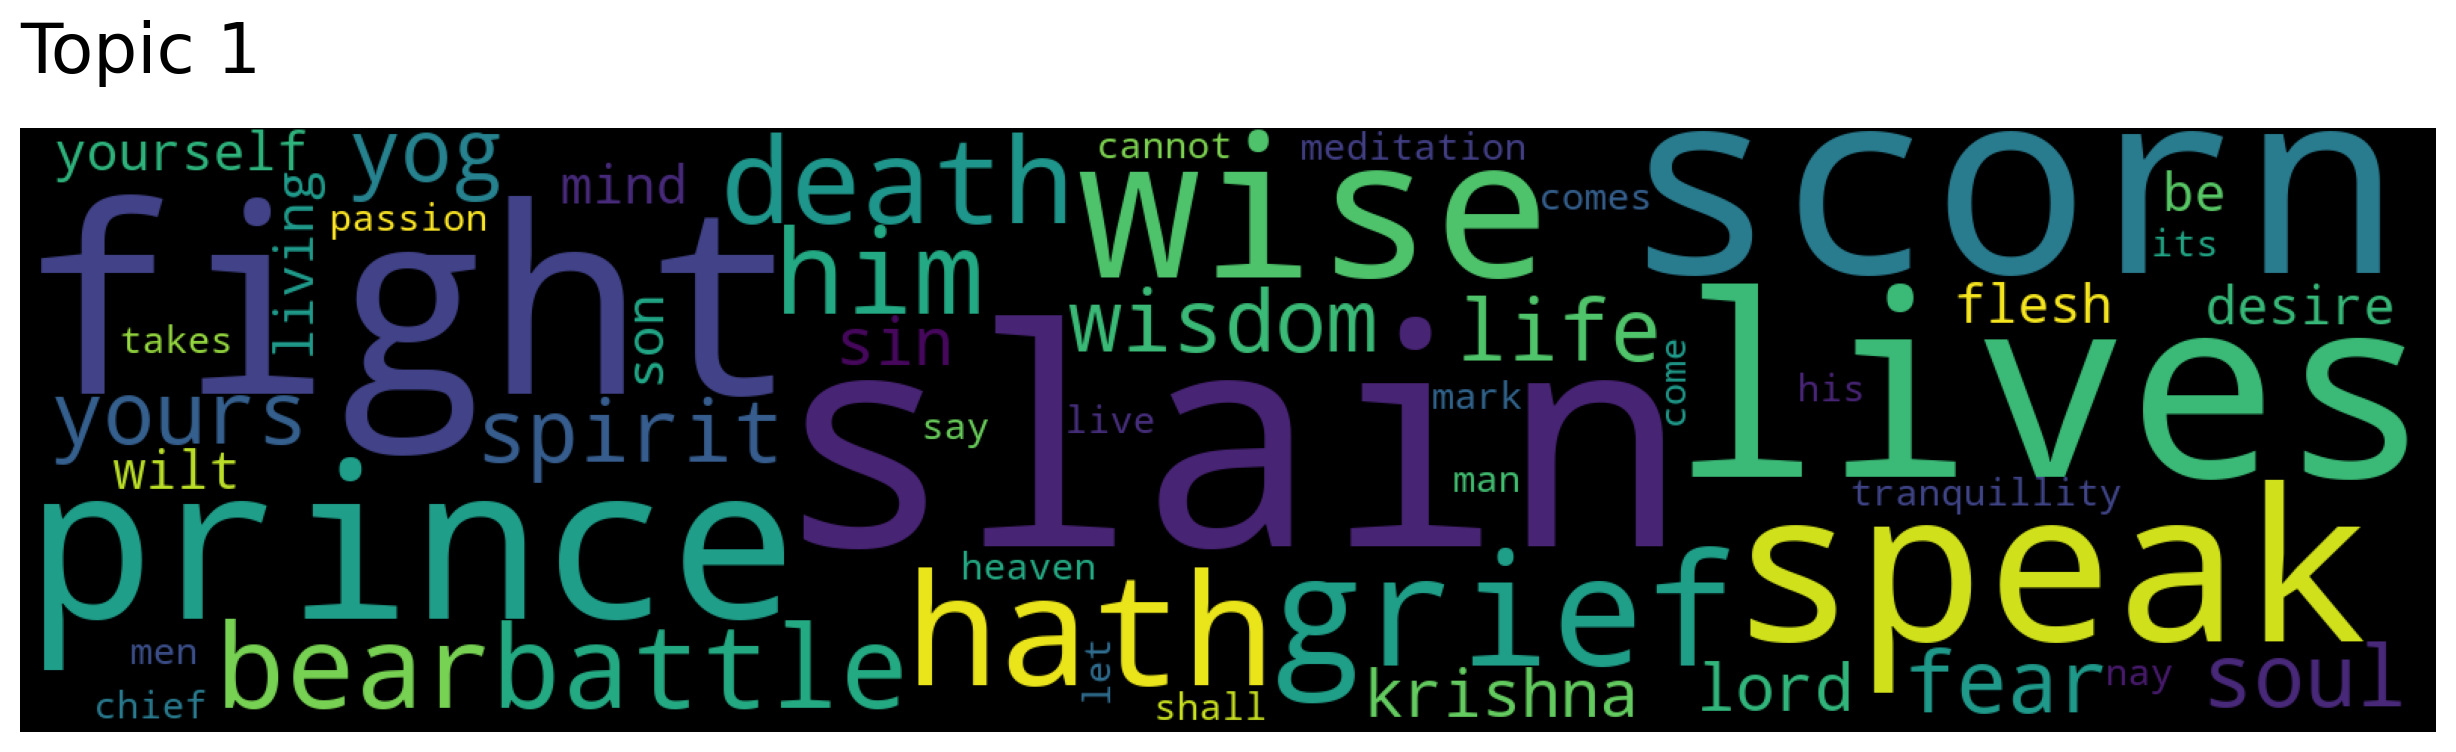

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(2)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [ ]:
topic_words

array([['soul', 'grief', 'spirit', 'death', 'scorn', 'deeds', 'yog',
        'meditation', 'sin', 'flesh', 'lord', 'wise', 'faith', 'krishna',
        'wisdom', 'desire', 'slain', 'heaven', 'mind', 'lives', 'be',
        'living', 'fear', 'tranquillity', 'nor', 'shall', 'live', 'of',
        'heart', 'passion', 'life', 'nay', 'know', 'end', 'your', 'the',
        'such', 'yourself', 'all', 'by', 'both', 'let', 'lo', 'not',
        'than', 'governed', 'who', 'those', 'its', 'never'],
       ['slain', 'fight', 'scorn', 'lives', 'prince', 'speak', 'wise',
        'grief', 'hath', 'death', 'bear', 'him', 'battle', 'spirit',
        'yog', 'wisdom', 'life', 'yours', 'fear', 'soul', 'krishna',
        'lord', 'sin', 'yourself', 'son', 'desire', 'mind', 'be',
        'living', 'flesh', 'wilt', 'tranquillity', 'live', 'let', 'its',
        'shall', 'meditation', 'men', 'his', 'nay', 'passion', 'heaven',
        'man', 'chief', 'cannot', 'mark', 'takes', 'say', 'come',
        'comes']], dtype=

## All Chapters using doc2vec

In [ ]:
model = Top2Vec(documents= all_chapters_sent, speed='learn', workers=8, min_count = 2, embedding_model='doc2vec')

2021-05-20 09:25:07,307 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2021-05-20 09:25:07,378 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2021-05-20 09:25:11,537 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2021-05-20 09:25:17,696 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2021-05-20 09:25:17,726 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
model.get_num_topics()

2

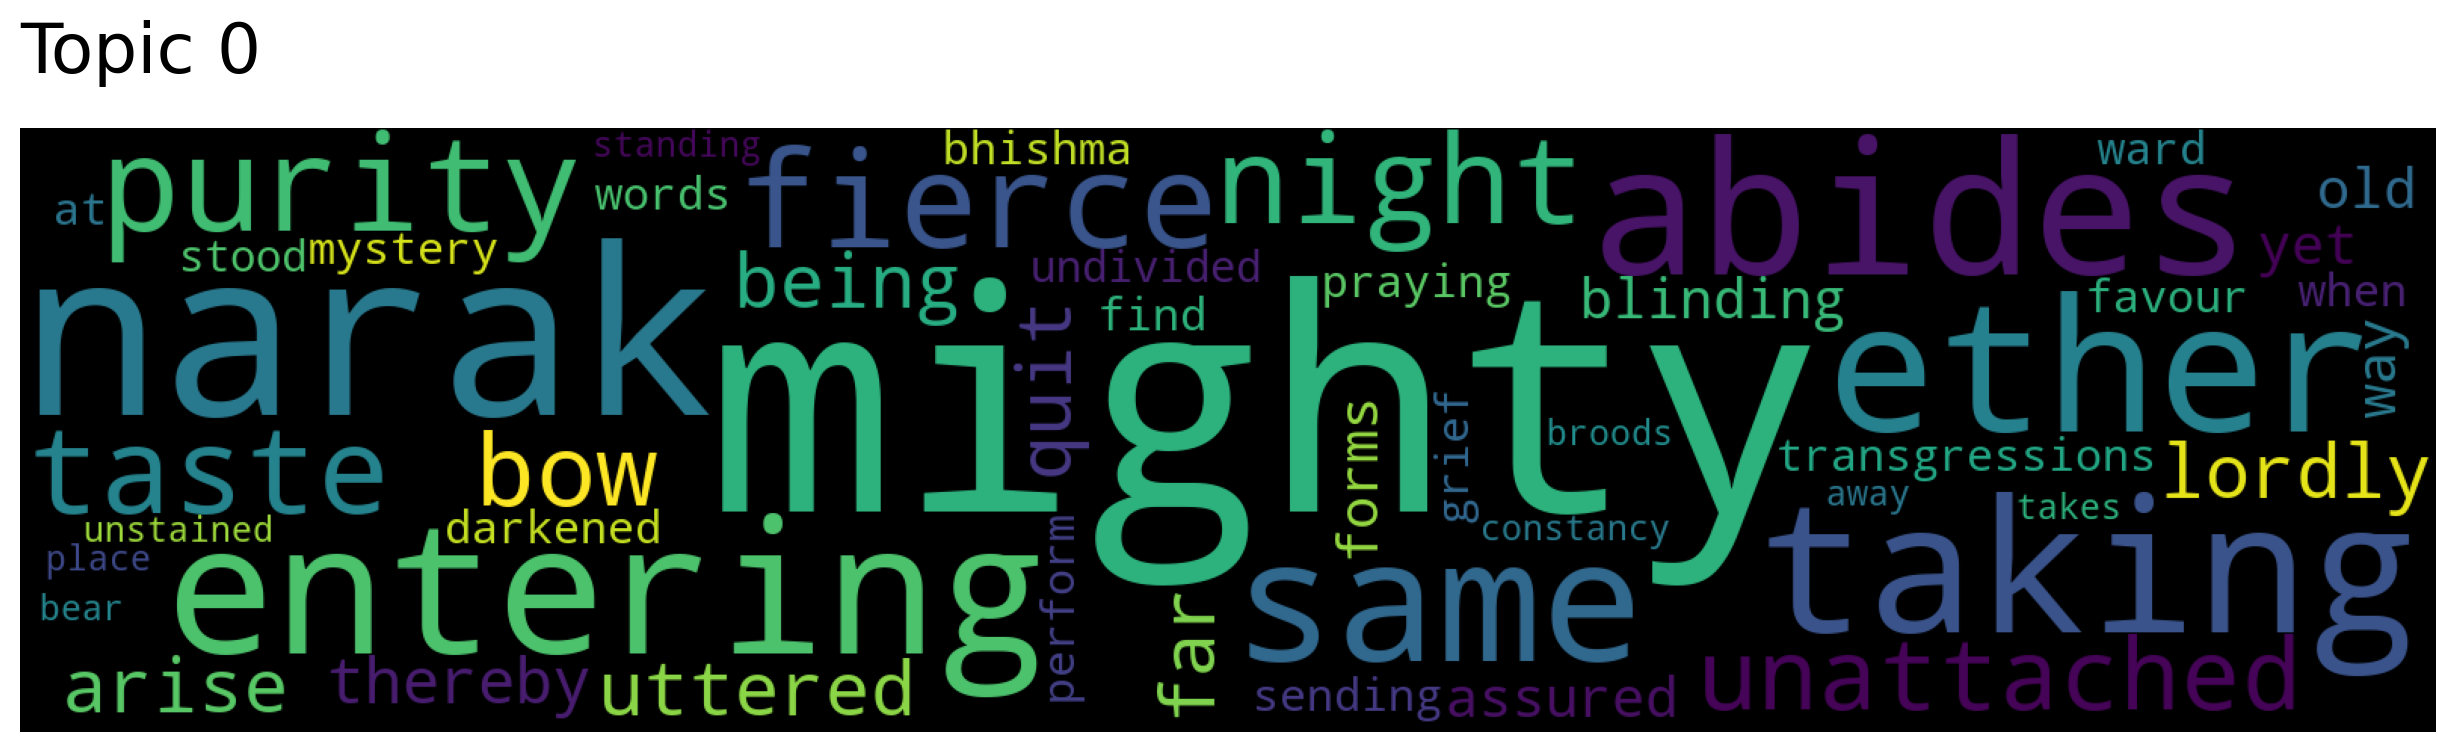

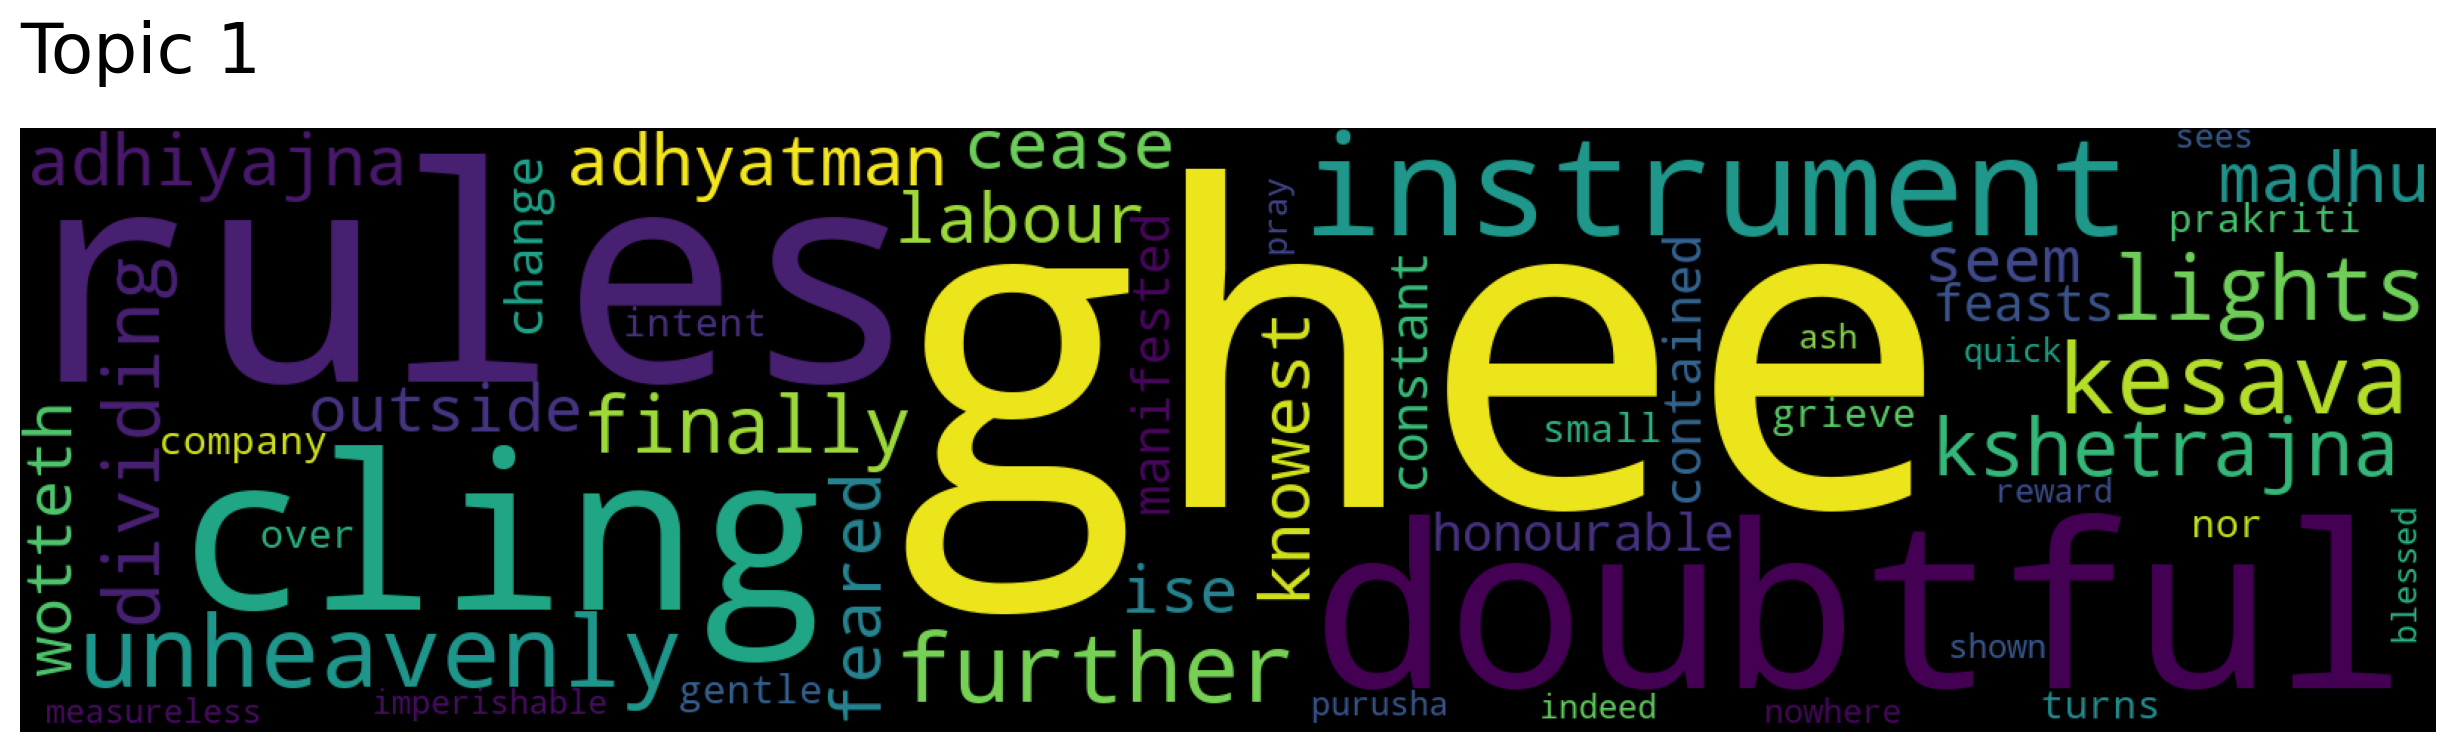

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(2)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [ ]:
topic_words

array([['mighty', 'narak', 'entering', 'taking', 'abides', 'ether',
        'same', 'purity', 'fierce', 'night', 'taste', 'unattached',
        'bow', 'lordly', 'arise', 'uttered', 'quit', 'being', 'far',
        'thereby', 'blinding', 'assured', 'old', 'way', 'forms', 'yet',
        'transgressions', 'sending', 'find', 'favour', 'when', 'mystery',
        'praying', 'words', 'ward', 'grief', 'bhishma', 'at', 'darkened',
        'perform', 'undivided', 'stood', 'constancy', 'unstained',
        'away', 'broods', 'bear', 'standing', 'place', 'takes'],
       ['ghee', 'rules', 'doubtful', 'cling', 'instrument', 'unheavenly',
        'kesava', 'further', 'lights', 'kshetrajna', 'finally',
        'dividing', 'adhyatman', 'cease', 'adhiyajna', 'knowest',
        'madhu', 'labour', 'feared', 'outside', 'ise', 'wotteth', 'seem',
        'honourable', 'feasts', 'manifested', 'contained', 'constant',
        'change', 'prakriti', 'gentle', 'over', 'company', 'nor',
        'small', 'grieve', '

### All Chapters using bert



In [ ]:
model = Top2Vec(documents= all_chapters_sent, speed="learn", workers=8, min_count = 2, embedding_model='universal-sentence-encoder')

2021-05-20 09:30:49,767 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2021-05-20 09:30:49,857 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model


2021-05-20 09:30:54,261 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


2021-05-20 09:30:54,805 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2021-05-20 09:31:01,796 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2021-05-20 09:31:01,832 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
model.get_num_topics()

5

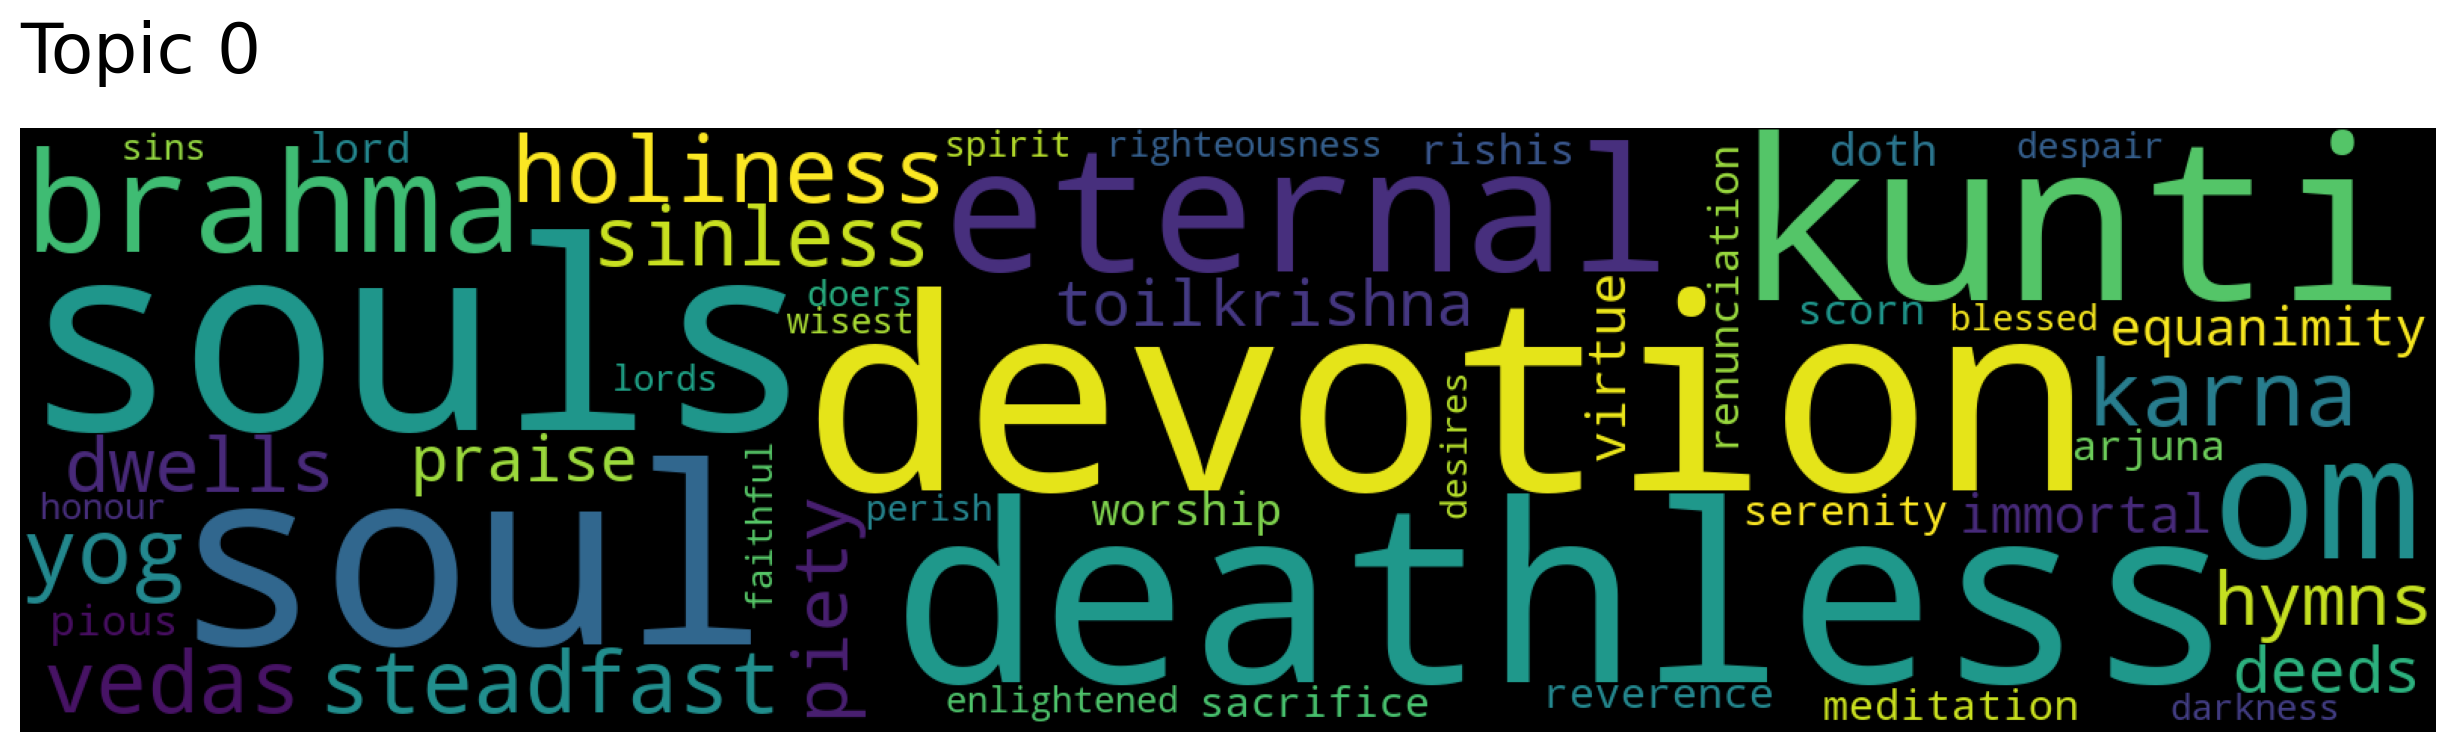

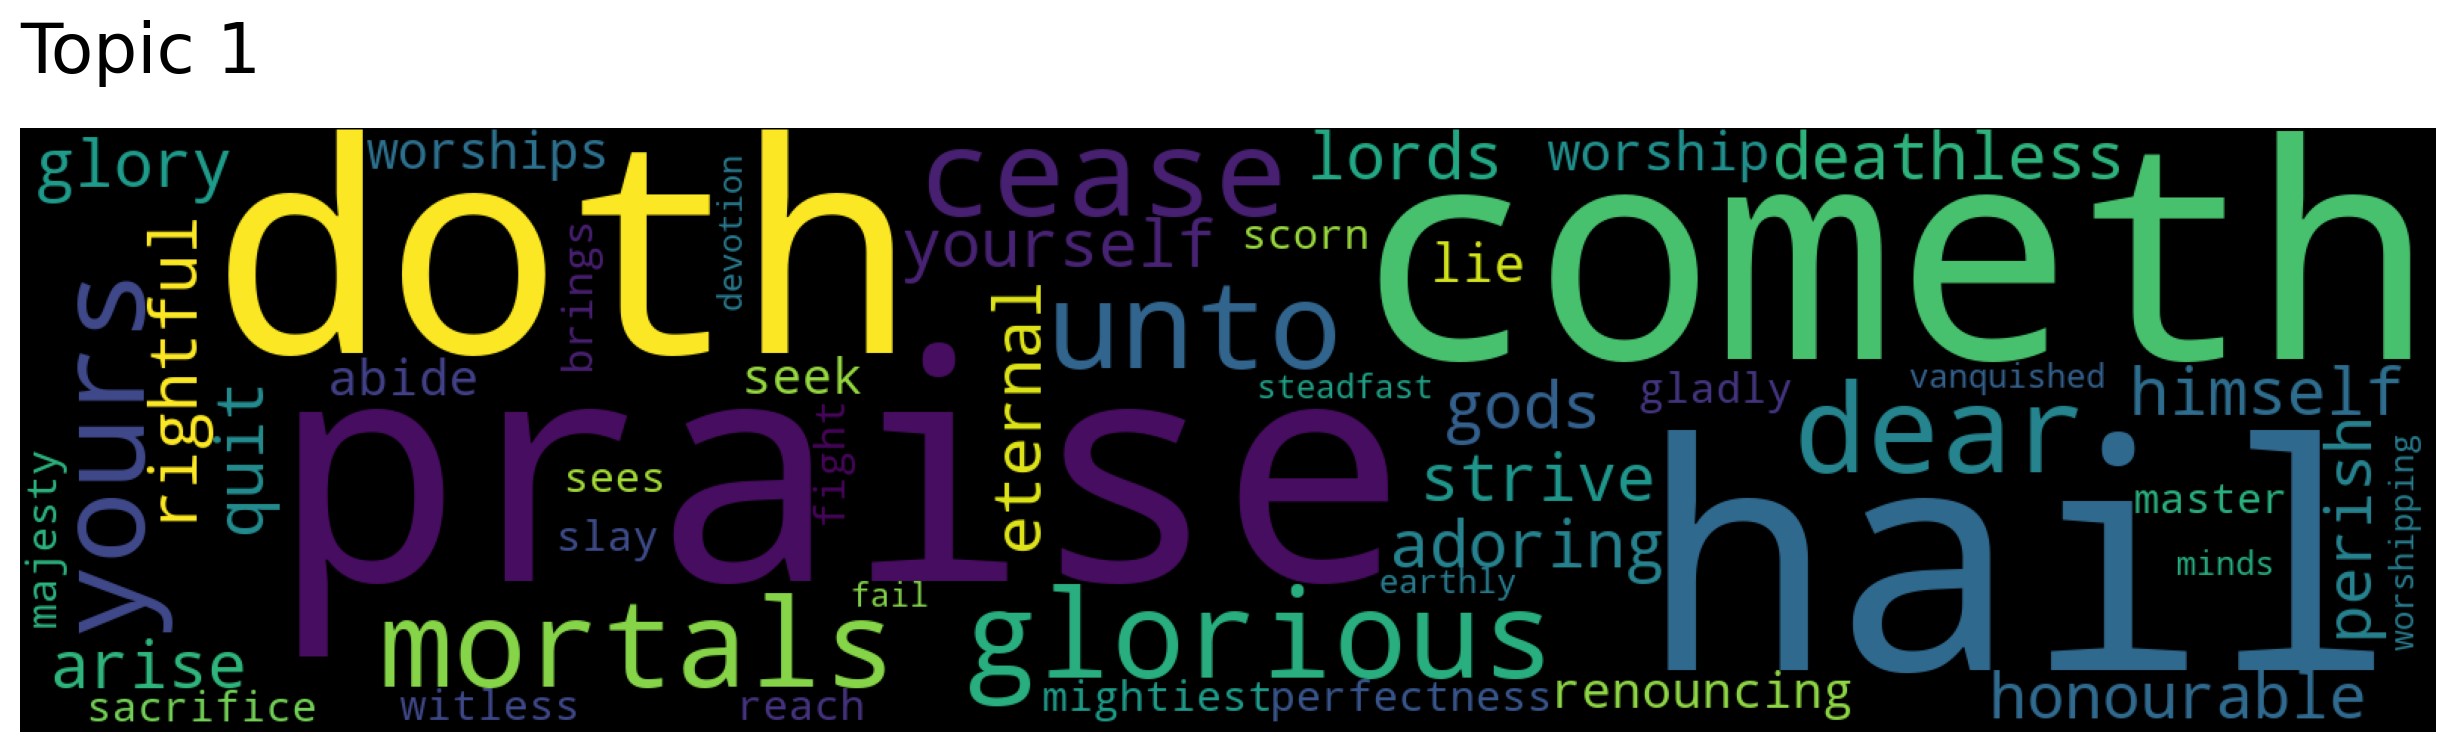

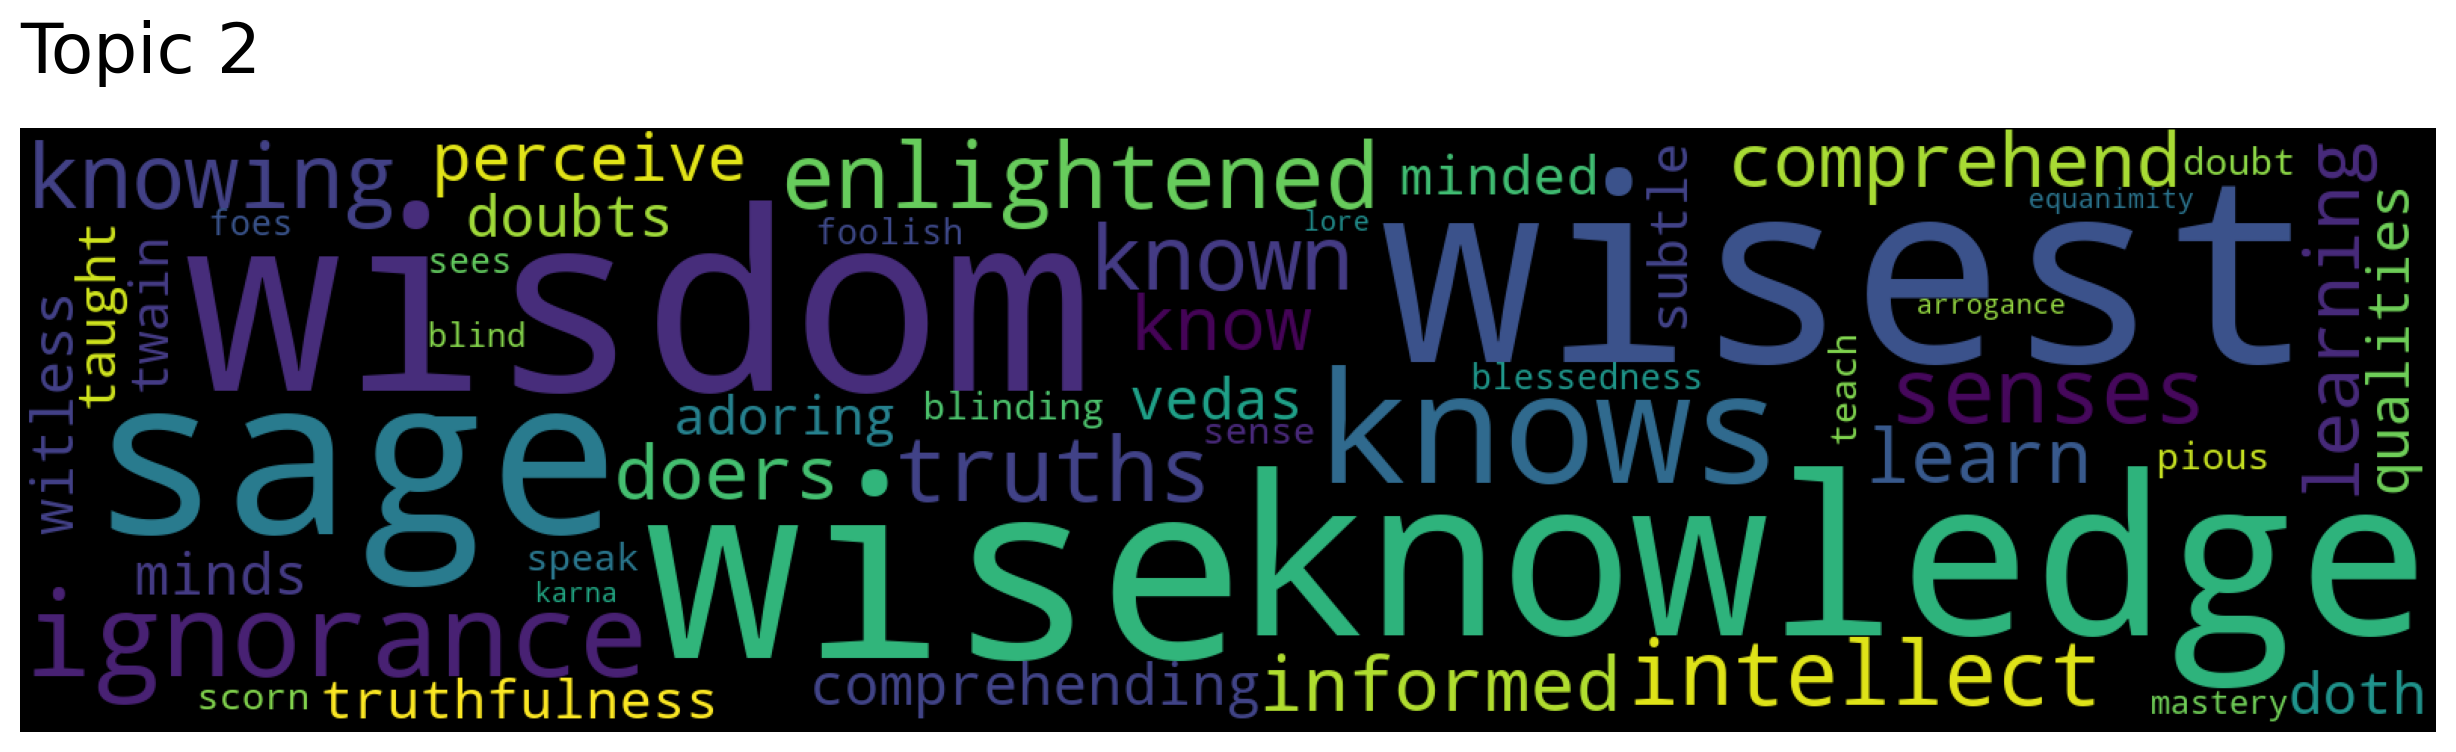

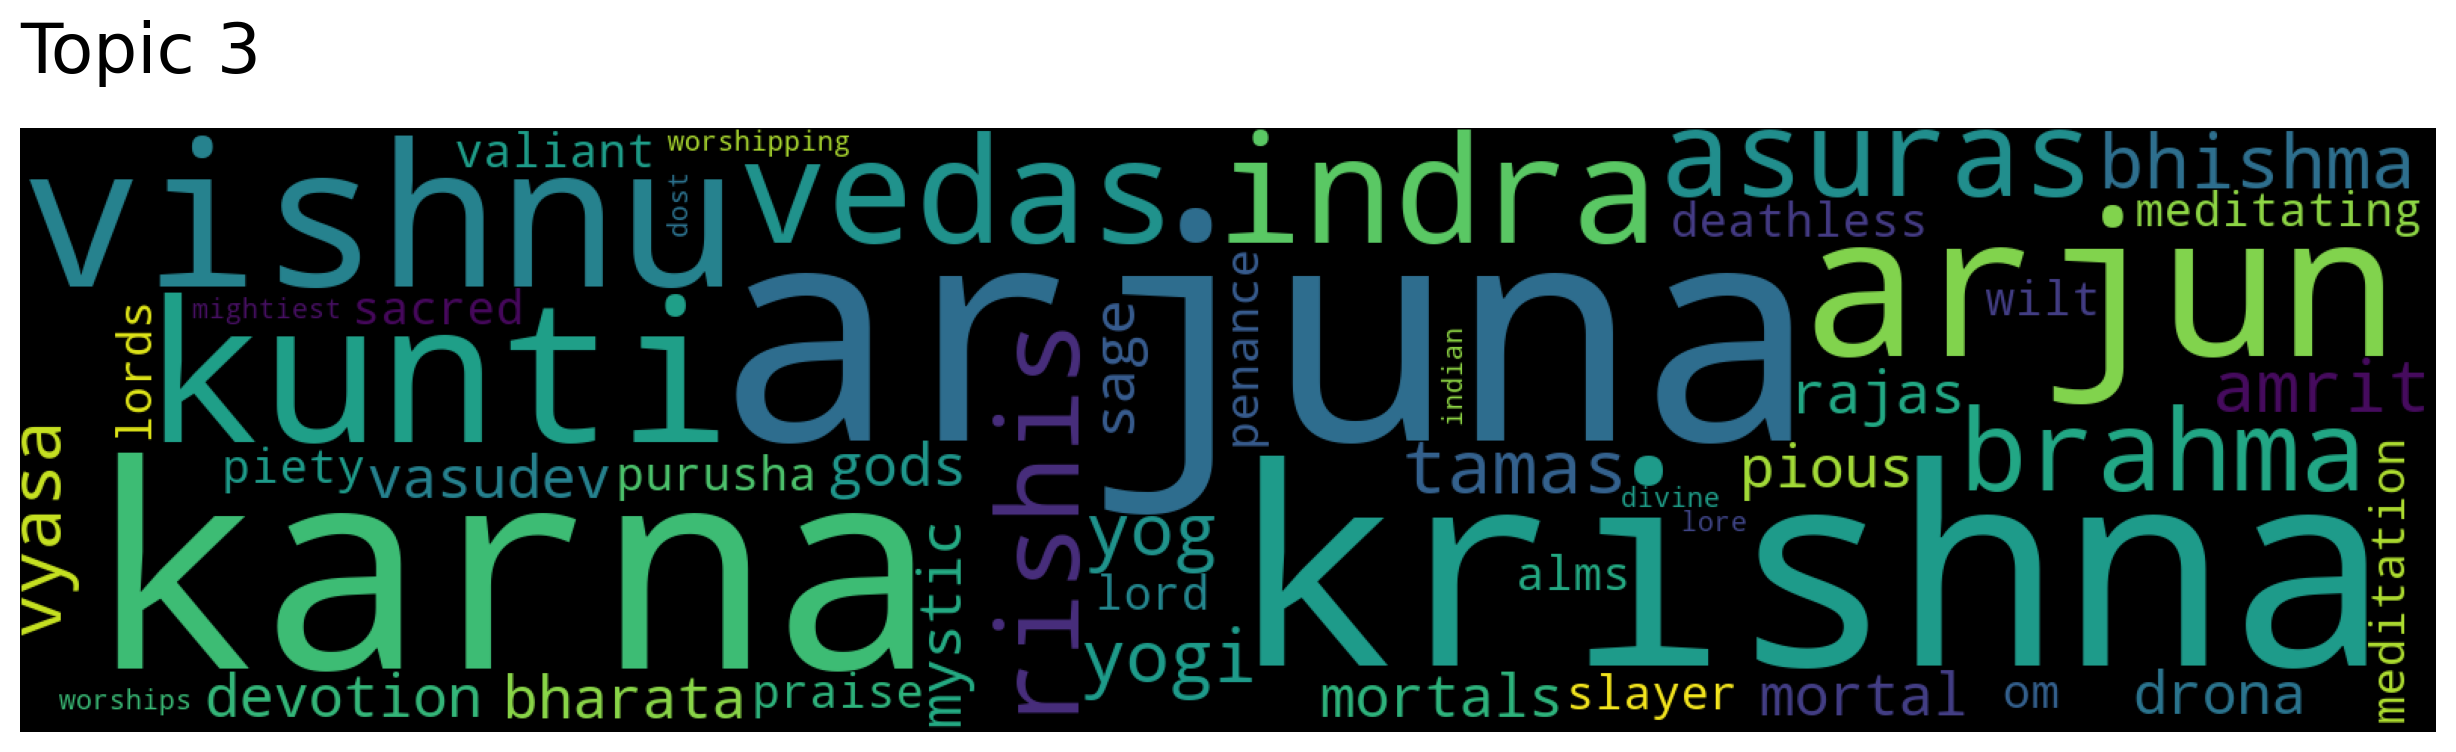

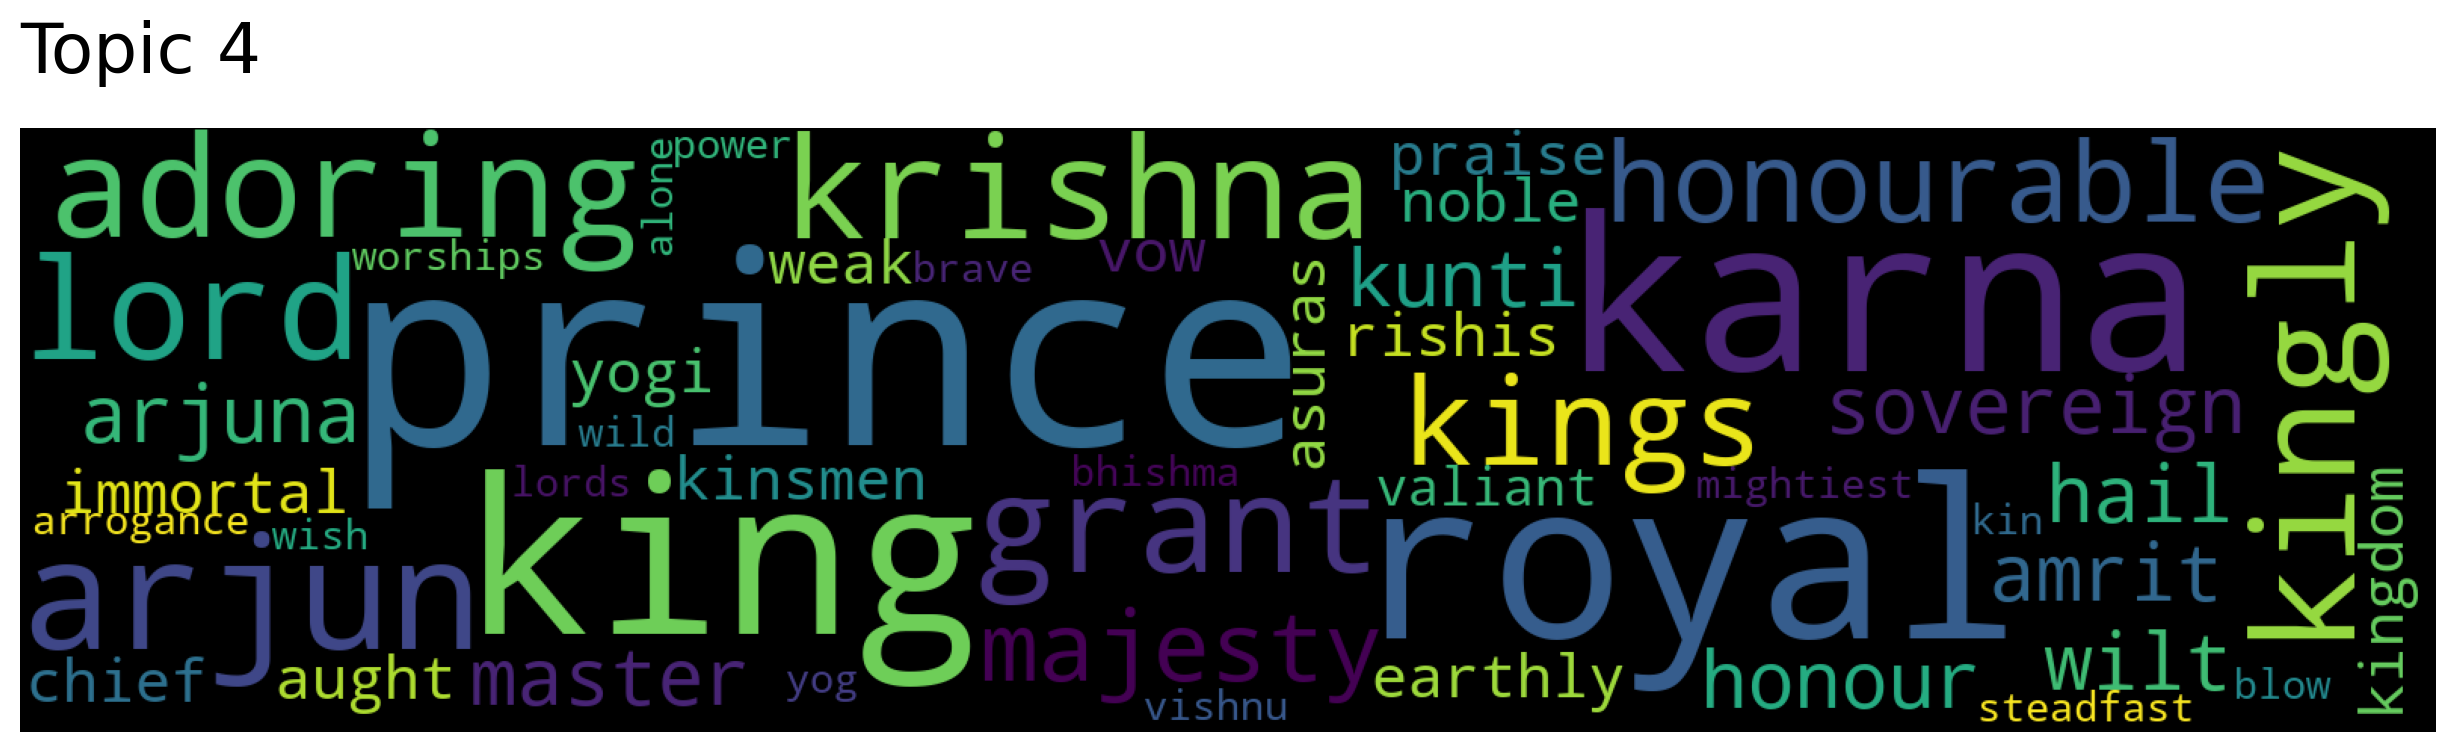

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [ ]:
topic_words

array([['devotion', 'souls', 'deathless', 'soul', 'kunti', 'eternal',
        'om', 'brahma', 'holiness', 'karna', 'yog', 'steadfast', 'vedas',
        'sinless', 'dwells', 'piety', 'hymns', 'praise', 'toil', 'deeds',
        'krishna', 'equanimity', 'virtue', 'immortal', 'worship', 'doth',
        'serenity', 'reverence', 'pious', 'sacrifice', 'rishis', 'lord',
        'arjuna', 'meditation', 'scorn', 'renunciation', 'enlightened',
        'despair', 'darkness', 'doers', 'righteousness', 'sins',
        'spirit', 'honour', 'wisest', 'faithful', 'perish', 'blessed',
        'lords', 'desires'],
       ['praise', 'hail', 'cometh', 'doth', 'glorious', 'yours', 'unto',
        'dear', 'mortals', 'cease', 'yourself', 'adoring', 'arise',
        'gods', 'himself', 'strive', 'glory', 'lords', 'rightful',
        'deathless', 'quit', 'eternal', 'honourable', 'perish',
        'worship', 'lie', 'worships', 'renouncing', 'seek', 'abide',
        'mightiest', 'fight', 'master', 'brings', 'sees',

## Chpater 11 using bert

In [ ]:
model = Top2Vec(documents= all_sent[10], speed="learn", workers=8, min_count = 2, embedding_model='universal-sentence-encoder')

2021-05-20 11:04:05,119 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2021-05-20 11:04:05,134 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model


2021-05-20 11:04:09,286 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


2021-05-20 11:04:09,569 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


2021-05-20 11:04:13,700 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2021-05-20 11:04:13,713 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


<bound method Top2Vec.get_num_topics of <top2vec.Top2Vec.Top2Vec object at 0x7fa2e5c60b50>>

In [ ]:
model.get_num_topics()

2

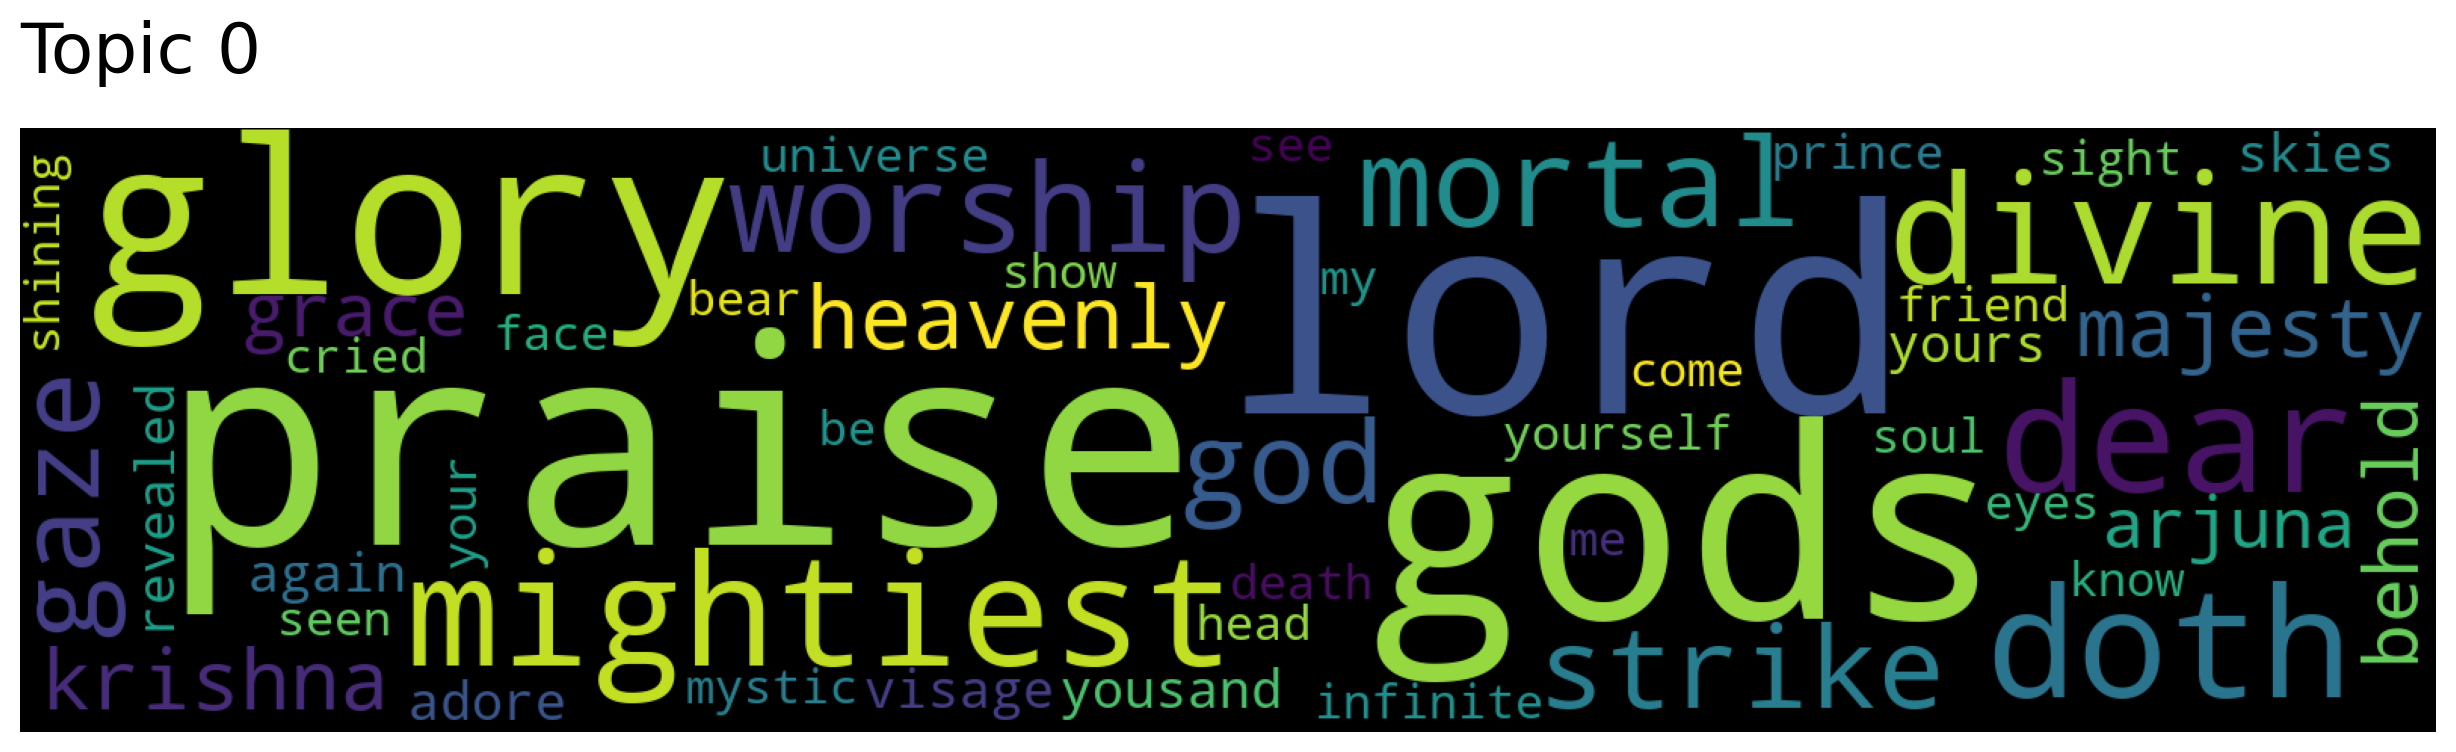

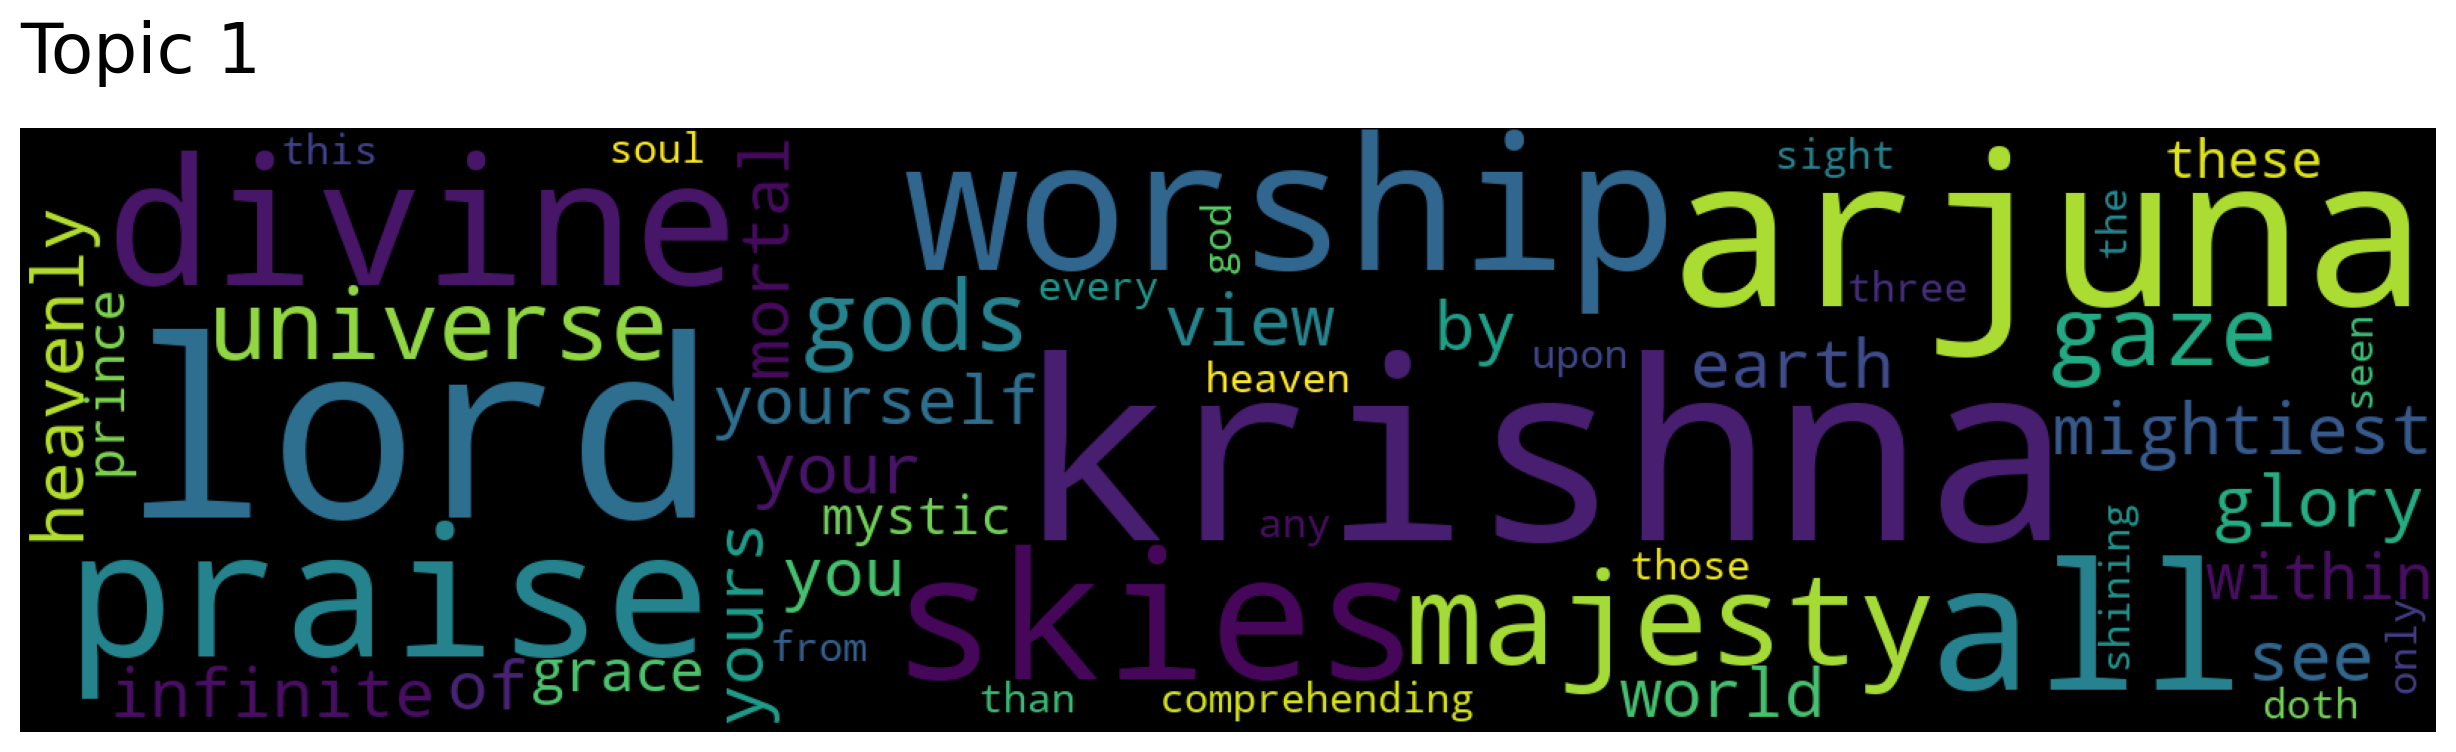

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(2)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [ ]:
topic_words

array([['lord', 'praise', 'gods', 'glory', 'mightiest', 'doth', 'divine',
        'dear', 'worship', 'mortal', 'strike', 'god', 'gaze', 'heavenly',
        'majesty', 'krishna', 'grace', 'behold', 'arjuna', 'yousand',
        'skies', 'again', 'visage', 'yours', 'adore', 'revealed',
        'yourself', 'face', 'come', 'prince', 'mystic', 'see', 'death',
        'head', 'universe', 'shining', 'cried', 'your', 'infinite',
        'eyes', 'sight', 'seen', 'me', 'friend', 'soul', 'bear', 'show',
        'know', 'my', 'be'],
       ['krishna', 'lord', 'arjuna', 'worship', 'praise', 'skies', 'all',
        'divine', 'majesty', 'universe', 'gaze', 'gods', 'mightiest',
        'your', 'view', 'glory', 'heavenly', 'see', 'yourself', 'of',
        'yours', 'infinite', 'earth', 'by', 'you', 'world', 'mortal',
        'within', 'grace', 'mystic', 'these', 'prince', 'comprehending',
        'doth', 'from', 'every', 'upon', 'soul', 'god', 'seen', 'this',
        'the', 'heaven', 'shining', 'three', 

## Chapter 18

In [ ]:
model = Top2Vec(documents= all_sent[17], speed="learn", workers=8, min_count = 2, embedding_model='universal-sentence-encoder')
model.get_num_topics()

2021-05-20 11:17:39,820 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2021-05-20 11:17:39,841 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model


2021-05-20 11:17:44,085 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


2021-05-20 11:17:44,386 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


2021-05-20 11:17:48,776 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2021-05-20 11:17:48,789 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


2

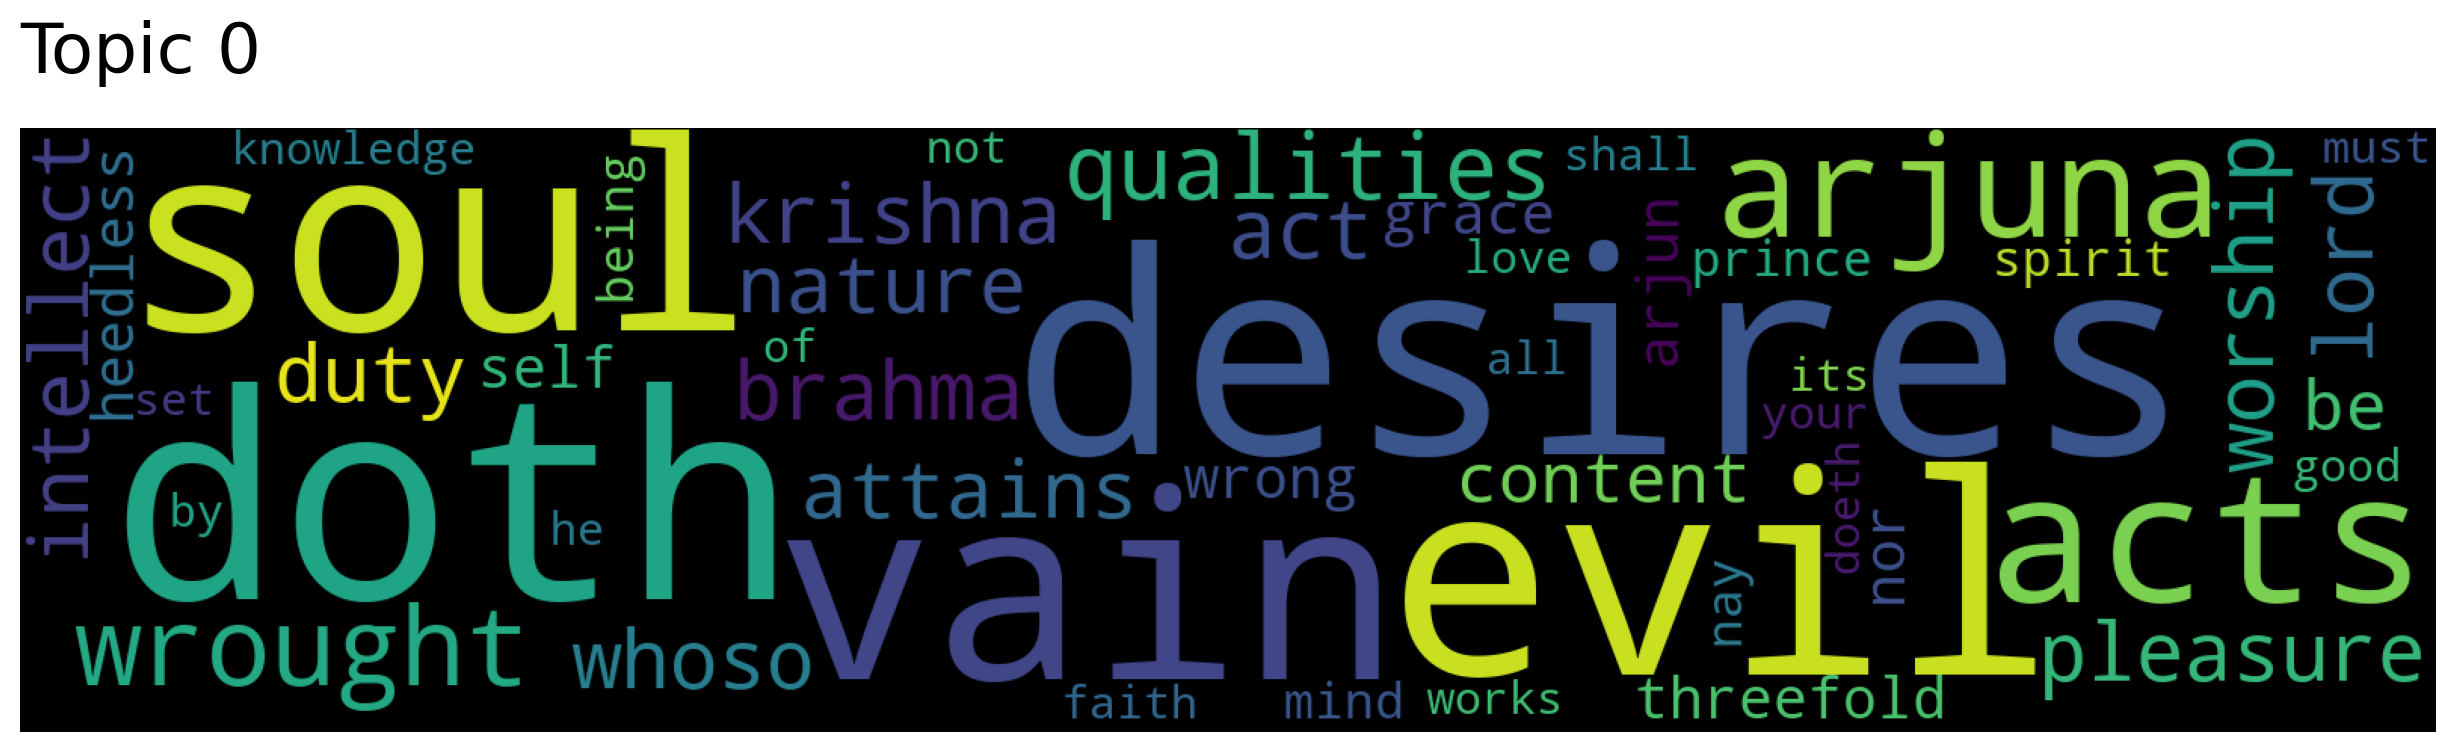

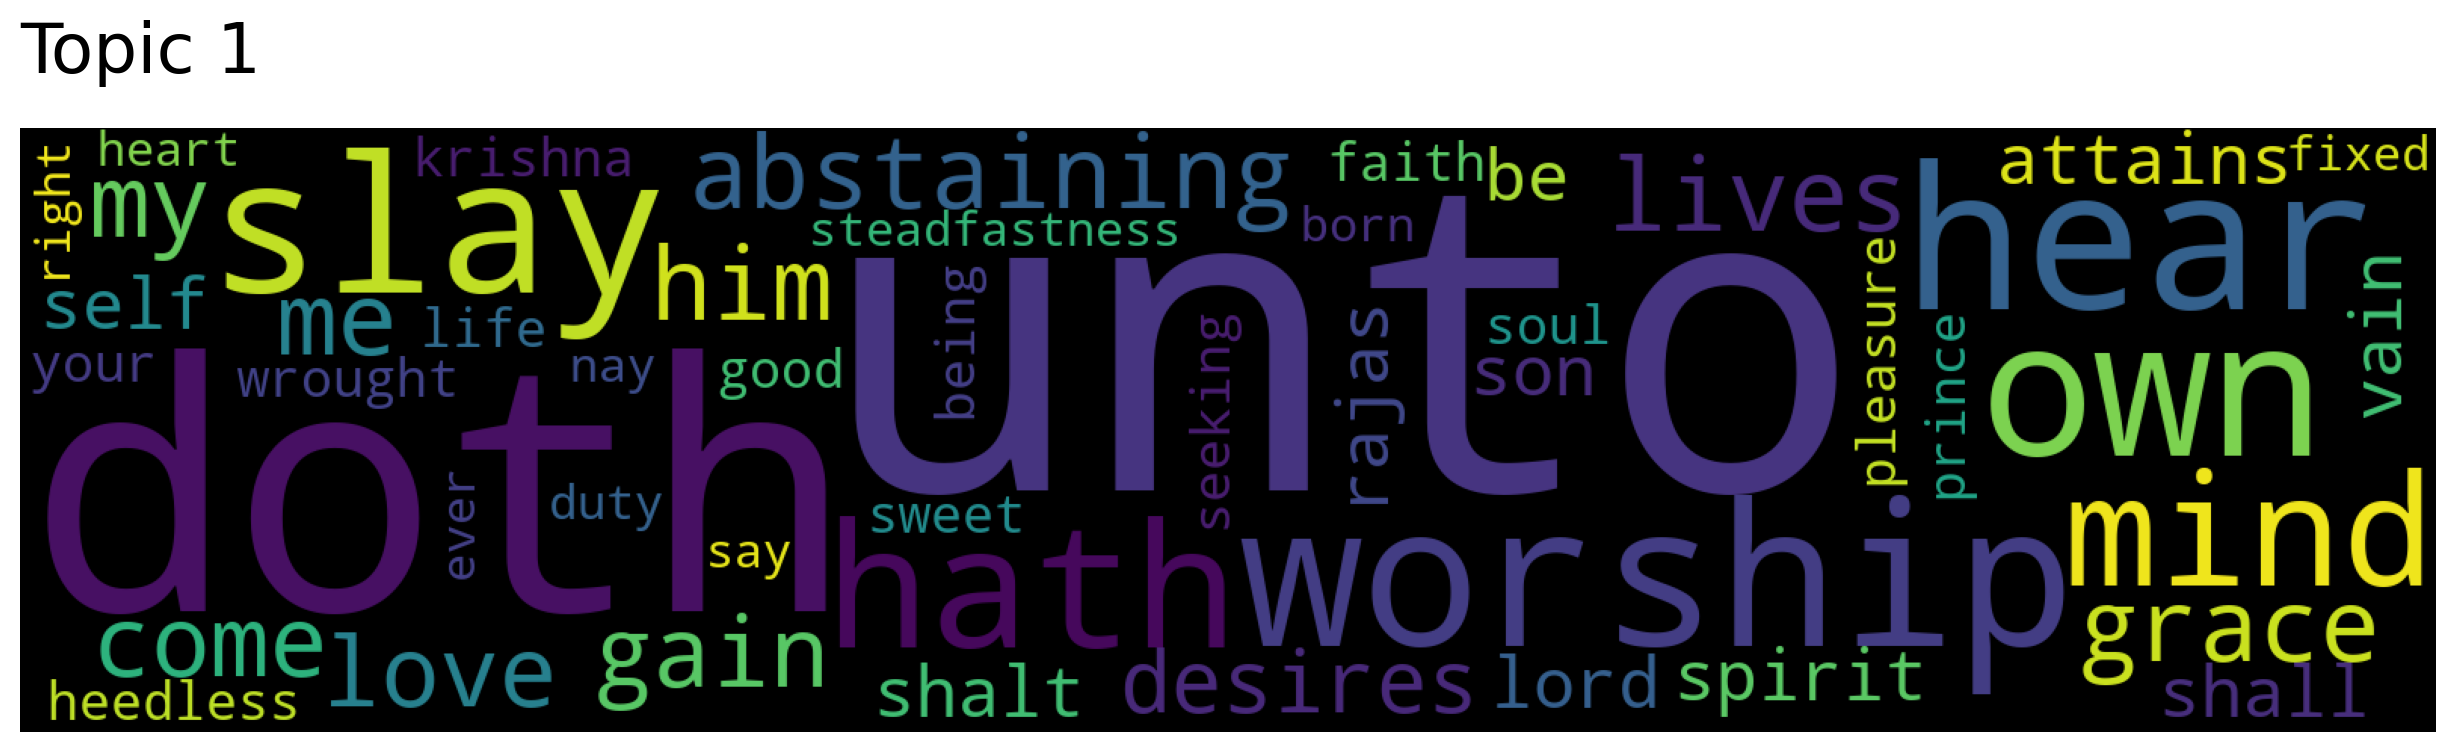

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(2)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)